<a href="https://colab.research.google.com/github/grace-arina/Diagnosing-Pneumonia_CNN/blob/starter-models/Olgert_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import os, shutil
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
np.random.seed(123)
import matplotlib.image as mpimg

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_folder = '/content/drive/MyDrive/Colab Notebooks/Diagnosing-Pneumonia_CNN/chest_xray'
os.listdir(base_folder)

['test', 'train', 'val']

In [5]:
train_dir = base_folder+'/train/'
test_dir = base_folder+'/test/'
val_dir = base_folder+'/val/'
train_dir

'/content/drive/MyDrive/Colab Notebooks/Diagnosing-Pneumonia_CNN/chest_xray/train/'

In [6]:
train_normal = os.path.join(train_dir, 'NORMAL')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA')

# test_normal = os.path.join(test_dir, 'NORMAL')
# test_pneumonia = os.path.join(test_dir, 'PNEUMONIA')

val_normal = os.path.join(val_dir, 'NORMAL')
val_pneumonia = os.path.join(val_dir, 'PNEUMONIA')

In [7]:
# train_normal = train_dir+'NORMAL/'
# train_pneumonia = train_dir+'PNEUMONIA/'
# test_normal = test_dir+'NORMAL/'
# test_pneumonia = test_dir+'PNEUMONIA/'
# val_normal = val_dir+'NORMAL/'
# val_pneumonia = val_dir+'PNEUMONIA/'

In [8]:
normal_cases = os.listdir(train_normal)
pneumonia_cases = os.listdir(train_pneumonia)
normal_cases

['IM-0520-0001.jpeg',
 'IM-0511-0001-0002.jpeg',
 'IM-0505-0001-0002.jpeg',
 'IM-0499-0001-0002.jpeg',
 'IM-0527-0001.jpeg',
 'IM-0502-0001.jpeg',
 'IM-0519-0001.jpeg',
 'IM-0505-0001-0001.jpeg',
 'IM-0523-0001-0001.jpeg',
 'IM-0507-0001.jpeg',
 'IM-0514-0001.jpeg',
 'IM-0526-0001.jpeg',
 'IM-0519-0001-0002.jpeg',
 'IM-0553-0001-0002.jpeg',
 'IM-0555-0001-0001.jpeg',
 'IM-0533-0001-0002.jpeg',
 'IM-0535-0001.jpeg',
 'IM-0566-0001.jpeg',
 'IM-0545-0001-0001.jpeg',
 'IM-0542-0001.jpeg',
 'IM-0543-0001.jpeg',
 'IM-0551-0001.jpeg',
 'IM-0549-0001.jpeg',
 'IM-0561-0001.jpeg',
 'IM-0564-0001.jpeg',
 'IM-0539-0001-0002.jpeg',
 'IM-0557-0001.jpeg',
 'IM-0553-0001.jpeg',
 'IM-0571-0001.jpeg',
 'IM-0541-0001.jpeg',
 'IM-0554-0001.jpeg',
 'IM-0540-0001.jpeg',
 'IM-0553-0001-0001.jpeg',
 'IM-0569-0001.jpeg',
 'IM-0547-0001.jpeg',
 'IM-0555-0001.jpeg',
 'IM-0549-0001-0002.jpeg',
 'IM-0551-0001-0002.jpeg',
 'IM-0546-0001.jpeg',
 'IM-0537-0001.jpeg',
 'IM-0549-0001-0001.jpeg',
 'IM-0539-0001.jpeg',
 

In [9]:
normal_cases_files = [os.path.join(train_normal, name) for name in normal_cases]
pneumonia_cases_files = [os.path.join(train_pneumonia, name) for name in pneumonia_cases]
normal_cases_files[0]

'/content/drive/MyDrive/Colab Notebooks/Diagnosing-Pneumonia_CNN/chest_xray/train/NORMAL/IM-0520-0001.jpeg'

In [10]:
def create_tensors(path_list):
    '''
    Generate tensors to be able to plot on axes
    
    Args:
        path_list (list of strings): Folder paths for images
    
    Returns:
        List of tensor arrays
    
    Example:
        create_tensors(image_path_list)
    '''
#   Create empty list
    tensors = []
    
#   Loop through paths to grab each image for processing and add to tensor list
    for path in path_list:
        img = load_img(path, target_size=(96, 96))
        img_tensor = img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.
        tensors.append(img_tensor)
        
    return tensors

In [11]:
# train_norm_images = [mpimg.imread(img) for img in normal_cases_files]
# train_pneumonia_images = [mpimg.imread(img) for img in pneumonia_cases_files]

In [12]:
normal_tens = create_tensors(normal_cases_files)

In [13]:
pn_tens = create_tensors(pneumonia_cases_files)

In [14]:
# Creating an datagenerator object that will perform image augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Datagenerators for the test and validation set will only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator  = train_datagen.flow_from_directory(train_dir, 
                                                 target_size=(96 ,96), 
                                                 batch_size=100)

test_generator  = test_datagen.flow_from_directory(test_dir, 
                                            target_size=(96 ,96), 
                                            batch_size= 100)
                                            
val_generator  = val_datagen.flow_from_directory(val_dir,
                                          target_size=(96 ,96), 
                                          batch_size=100)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)
train_labels[0]

array([1., 0.], dtype=float32)

In [17]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 100
Number of testing samples: 100
Number of validation samples: 16
train_images shape: (100, 96, 96, 3)
train_labels shape: (100, 2)
test_images shape: (100, 96, 96, 3)
test_labels shape: (100, 2)
val_images shape: (16, 96, 96, 3)
val_labels shape: (16, 2)


In [18]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(100, 27648)
(100, 27648)
(16, 27648)


In [19]:
train_y = np.reshape(train_labels[:,0], (100,1))
test_y = np.reshape(test_labels[:,0], (100,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 66270)             0         
                                                                 
 dense (Dense)               (None, 30)                1988130   
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 7)                 112       
                                                        

In [22]:
def model_builder(layers, train_image_tensor,test_image_tensor,test_labels, labels,epochs=None, batch_size=None):
  model = Sequential(layers)
  model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
  print(model.summary())
  model.fit(train_image_tensor, labels, epochs=100,batch_size=50,validation_data=(val_images, val_y))
  results_train = model.evaluate(train_image_tensor, labels)
  results_test = model.evaluate(test_image_tensor, test_labels)


In [23]:
#model with build in epoch, batch size
def model_builder(layers, train_image_tensor, labels,epochs=None, batch_size=None):
  model = Sequential(layers)
  model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
  print(model.summary())
  model.fit(train_image_tensor, labels, epochs=100,batch_size=50,validation_data=(val_images, val_y))
  results_train = model.evaluate(train_images, train_y)
  results_test = model.evaluate(test_images, test_y)

In [24]:
test = [Conv2D(filters=30, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'),
          MaxPooling2D((2, 2)),#1st layer
          Flatten(),
          Dense(30, activation='relu'),
          Dense(15, activation='relu'),
          Dense(7, activation='relu'),
          Dense(1, activation='sigmoid')]

In [25]:
model_builder(test,train_images,train_y, epochs=50, batch_size=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 94, 94, 30)        840       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 30)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 66270)             0         
                                                                 
 dense_4 (Dense)             (None, 30)                1988130   
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 7)                 112       
                                                      

In [26]:
model1= model.fit(train_images, train_y, epochs=100,batch_size=50,validation_data=(val_images, val_y))

Epoch 1/100
2/2 [==============================] - 1s 193ms/step - loss: 0.6529 - accuracy: 0.5100 - val_loss: 2.3031 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6683 - accuracy: 0.8300 - val_loss: 0.6598 - val_accuracy: 0.6875
Epoch 3/100
2/2 [==============================] - 0s 58ms/step - loss: 0.5259 - accuracy: 0.6500 - val_loss: 1.5250 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 58ms/step - loss: 0.5348 - accuracy: 0.8300 - val_loss: 1.5165 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 0.4420 - accuracy: 0.8300 - val_loss: 0.6850 - val_accuracy: 0.5625
Epoch 6/100
2/2 [==============================] - 0s 59ms/step - loss: 0.4052 - accuracy: 0.9200 - val_loss: 0.7111 - val_accuracy: 0.5625
Epoch 7/100
2/2 [==============================] - 0s 60ms/step - loss: 0.3383 - accuracy: 0.8500 - val_loss: 1.1539 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [27]:
results_train = model.evaluate(train_images, train_y)

4/4 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000


In [28]:
results_test = model.evaluate(test_images, test_y)

4/4 [==============================] - 0s 7ms/step - loss: 1.3985 - accuracy: 0.6900


In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

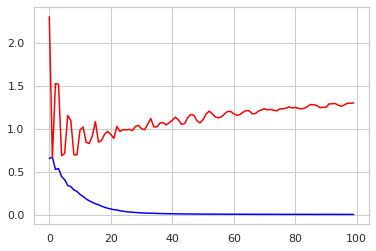

In [30]:
plt.plot(model1.history["loss"],color= "blue", label= train_y)
plt.plot(model1.history["val_loss"],color= "red", label= train_y)
plt.grid(True)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
def
  acc = model1.history['accuracy']
  val_acc = model1.history['val_accuracy']
  loss = model1.history['loss']
  val_loss = model1.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

SyntaxError: ignored